In [133]:
%matplotlib inline

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from collections import Counter
import operator
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import Pyro4

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

# First store the data in a SQL database

In [134]:
dbname = 'tweets'
username = 'Peter'

In [195]:
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print engine.url

postgres://Peter@localhost/tweets


In [196]:
# Needed to use `createdb Peter` on bash terminal before psql would work

if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [229]:
tweets = pd.read_csv('Tweets-CustomerSupport.csv', sep=';',index_col='id')
#tweets = pd.read_csv('tweets-customer-support2.csv', sep=';',index_col='id')
tweets = tweets.drop_duplicates('tweetId')
tweets.columns = ['account','from_handler','to_handler','message','time_stamp','tweet_id']

In [230]:
tweets.to_sql('tweets_table', engine, if_exists='replace')

In [244]:
# Create connection to database
con = psycopg2.connect(database = dbname, user = username)

In [247]:
# query:
#sql_query = """
#SELECT * FROM tweets_table;
#"""

#select id, account, message from tweets_table limit 20;
#select * from tweets_table limit 20; 

sql_query = """
select id, account, message, tweet_id from tweets_table limit 5;
"""

def sqlPandasQuery(myQuery):
    tweets_from_sql = pd.read_sql_query(myQuery,con)
    return tweets_from_sql

sqlPandasQuery(sql_query)

,id,account,message,tweet_id
0,1,@1ShirtSupport,@PissedOffBiotic You got it! Just email us you...,688951251455754241
1,2,@1ShirtSupport,@LordEstevez Thanks for the info! Well check o...,688913360679653376
2,3,@1ShirtSupport,@LordEstevez Just want to make sure we have al...,688907453212184576
3,4,@1ShirtSupport,@LordEstevez found it! It actually shows up as...,688907258206367744
4,5,@1ShirtSupport,@LightingAshley It should be just about to be ...,688898486025060352


In [ ]:
### can I do a SQL query to find conversations of given length?

In [38]:
tweets = pd.read_csv('Tweets-CustomerSupport.csv', sep=';',index_col='id')

In [39]:
#Get rid of duplicate tweets
tweets.drop_duplicates('tweetId')
tweets.head()

,account,fromHandler,toHandler,message,timestamp,tweetId
id,,,,,,
1,@1ShirtSupport,@1ShirtSupport,@PissedOffBiotic,@PissedOffBiotic You got it! Just email us you...,01/18/2016 05:09:13,688951251455754241
2,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez Thanks for the info! Well check o...,01/18/2016 02:38:39,688913360679653376
3,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez Just want to make sure we have al...,01/18/2016 02:15:10,688907453212184576
4,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez found it! It actually shows up as...,01/18/2016 02:14:24,688907258206367744
5,@1ShirtSupport,@1ShirtSupport,@LightingAshley,@LightingAshley It should be just about to be ...,01/18/2016 01:39:32,688898486025060352


In [82]:
tweets[tweets.fromHandler=='@LordEstevez']['message'].iloc[0]

'@1ShirtSupport yeah I know how it says it got delivered on the 24th by  nothing arrived that day'

In [40]:
np.unique(tweets.account)

array(['@1ShirtSupport', '@Airbnb', '@AmazonHelp', '@AskAmex', '@Avis',
       '@BCBSIL', '@GoDaddyHelp', '@Hootsuite_Help', '@InstapaperHelp',
       '@JetBlue', '@Kohls', '@MasterCard', '@MicrosoftHelps',
       '@TmobileHelp', '@americanair', '@fedexhelp', '@nikestore',
       '@schuh', '@verizon'], dtype=object)

In [48]:
def getFromTweets(userAccount):
    """Function to print the number of tweets from a given account"""
    tweetNum = str(np.sum(tweets['toHandler']==userAccount))
    print 'Tweets from %s: %s' % (userAccount, tweetNum)

In [49]:
for i in list(np.unique(tweets.account)):
    getFromTweets(i)

Tweets from @1ShirtSupport: 532
Tweets from @Airbnb: 23
Tweets from @AmazonHelp: 2991
Tweets from @AskAmex: 43
Tweets from @Avis: 360
Tweets from @BCBSIL: 78
Tweets from @GoDaddyHelp: 526
Tweets from @Hootsuite_Help: 180
Tweets from @InstapaperHelp: 38
Tweets from @JetBlue: 75
Tweets from @Kohls: 681
Tweets from @MasterCard: 38
Tweets from @MicrosoftHelps: 653
Tweets from @TmobileHelp: 0
Tweets from @americanair: 0
Tweets from @fedexhelp: 0
Tweets from @nikestore: 6295
Tweets from @schuh: 495
Tweets from @verizon: 71


In [52]:
verTweets = tweets[tweets.toHandler=='@verizon']

# Gensim code

In [574]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim import corpora, models
#import os
#import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import timeit
from re import sub

In [519]:
#tweets.iloc[0]['message']

In [506]:
#set(stopwords.words('english'))

In [380]:
sub()

In [520]:
#tweetList[0]

In [560]:
wnl = WordNetLemmatizer()

In [807]:
#Functions for data cleaning

def removePunc(myWord):
    if myWord is None:
        return myWord
    else:
        return sub('[.:;()/!@$,?^\d+]','',myWord)
        
def removeAscii(myWord):
    if myWord is None:
        return myWord
    else:
        return str(sub(r'[^\x00-\x7F]+','', myWord.decode('utf-8').strip()))

def removeEmpty(myWord):
    if myWord != ' ' and myWord != '':
        return myWord

def lemmatize(myWord):
    if myWord is None:
        return myWord
    else:
        return wnl.lemmatize(myWord)

def removeStopWords(myWord):
    if myWord is None:
        return myWord
    if myWord not in str(stopwords.words('english')):
        return myWord

def removeLinkUser(myWord):
    if not myWord.startswith('@') and not word.startswith('http'):
        return myWord

def prepText(myWord):
    return removeStopWords(
        lemmatize(
            removeAscii(
                removePunc(
                    removeLinkUser(
                        myWord.lower()
                    )
                )
            )
        )
    )


In [699]:
#def removeEmpty(myWord):
#    if myWord != ' ' and myWord != '':
#        return myWord

#removeEmpty('')
    
#removeAscii(removePunc('14!@45Aa^?/!\x00'))
#sub(r'[^\x00-\x7F]+',' ','\x00')

In [821]:
# working version
#tweetList = [[word.lower() for word
#                in tweet.split()
#                    if word.lower() not in str(stopwords.words('english'))
#                    and not word.startswith('@')
#                    and not word.startswith('http')]
#                 for tweet in tweets['message']]

# New try to get rid of junk
tweetList = [[prepText(word) for word
                in tweet.split()
                    if prepText(word) is not None]
                for tweet in tweets['message']]


In [ ]:
# Function to filter all tweets

def filterTweetList(tweetList):
    return [[prepText(word) for word
                in tweet.split()
                    if prepText(word) is not None]
                for tweet in tweetList]

In [466]:
%%timeit
# Using iterator:             10 loops, best of 3: 137 ms per loop
# Using double list comprhxn: 10 loops, best of 3: 141 ms per loop

# Iterator
for tweet in (tweet for tweet in verTweets['message']):
    [word.lower() for word in tweet.split() if word not in str(stopwords.words('english')) and not word.startswith('@') and not word.startswith('http')]
#[[word.lower() for word in tweet.split() if word not in stopwords.words('english') and not word.startswith('@') and not word.startswith('http')] for tweet in verTweets['message']]


10 loops, best of 3: 156 ms per loop


### Using an iterator doesn't speed up the data cleaning

In [822]:
dictionary = corpora.Dictionary(tweetList)

In [711]:
saveDir = '/Users/Peter/git/insight/projMsgAi/'
dictionary.save(saveDir + "tweet_dict.dict")

In [704]:
print dictionary

Dictionary(30301 unique tokens: [u'', u'veeeeeerrryyyy', u'darrylm', u'sonja', u'nallez']...)


In [823]:
corpus = [dictionary.doc2bow(tweet) for tweet in tweetList]
#tfidfCorpus = models.TfidfModel(corpus)

In [706]:
corpora.MmCorpus.serialize(saveDir + "tweet_corpus.dict", corpus)
#corpora.MmCorpus.serialize(saveDir + "tfidf_tweet_corpus.dict", tfidfCorpus)

In [661]:
# Try tfidf
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [476]:
corpus_tfidf = tfidf[corpus]

## Wanted to check the speed saved by parallelization using `%%timeit`
#### Without multicore:  
_Code_  
`lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=50, passes=10, iterations=50,alpha=0.001)`  

_`Output from %%timeit`_  
`1 loops, best of 3: 11min 10s per loop`

#### With multicore:  
_Code_  
`lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=50, passes = 10,iterations=50,alpha=0.001)`  
_`Output from %%timeit`_  
`1 loops, best of 3: 6min 17s per loop`  



# Bottom line: _multicore LDA is about twice as fast_


In [824]:
lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=50, passes=10,
    iterations=50,alpha=0.001)

In [680]:
topTopics = lda.top_topics(corpus)

In [708]:
import pyLDAvis.gensim
# turn on automatic rendering of visualizations
pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
2      4.296030        1       1 -0.243182  0.222004
32     3.372647        1       2 -0.137893  0.035918
9      3.371468        1       3 -0.133964  0.022949
22     3.282757        1       4 -0.005820 -0.018586
27     3.149050        1       5 -0.166733 -0.051173
41     2.934993        1       6 -0.219802  0.040955
18     2.756974        1       7 -0.225999  0.144361
7      2.756857        1       8 -0.289602  0.180316
39     2.739547        1       9 -0.024793  0.031296
43     2.669495        1      10  0.012681 -0.027855
33     2.384416        1      11 -0.095415  0.067532
45     2.345507        1      12  0.037436 -0.021353
17     2.262854        1      13  0.237321  0.184167
31     2.167785        1      14 -0.016406 -0.085245
24     2.095956        1      15  0.189257  0.093990
4      2.089940        1      16  0.193457  0.115576
10     2.080371        1      17  0.054775 -0.053972
46     2.067473        1      18 -0.019042 -0.126092
14     2.018599        1      19 -0.038494 -0.050032
3      1.990937        1      20 -0.037096 -0.126962
28     1.947810        1      21  0.063796  0.013529
26     1.932229        1      22  0.024726 -0.053183
35     1.890837        1      23  0.114867  0.037610
34     1.836377        1      24  0.033492 -0.076295
15     1.835710        1      25  0.094197 -0.015391
12     1.831465        1      26  0.174255  0.171655
47     1.819065        1      27  0.010651 -0.094877
20     1.786902        1      28 -0.016009 -0.046273
11     1.748840        1      29  0.143258  0.129186
5      1.747544        1      30 -0.104715  0.127361
36     1.732775        1      31  0.044392 -0.075963
38     1.678997        1      32 -0.036320 -0.017903
49     1.666248        1      33  0.024903  0.063064
16     1.654582        1      34  0.011714 -0.079828
6      1.641177        1      35  0.026127 -0.045856
29     1.629235        1      36 -0.100643 -0.072339
30     1.624133        1      37 -0.100691 -0.041534
40     1.509824        1      38 -0.013640 -0.133124
23     1.477473        1      39  0.065935  0.016602
1      1.453148        1      40 -0.018316 -0.107644
48     1.378781        1      41  0.036056 -0.026574
44     1.344172        1      42  0.001621 -0.073844
25     1.323491        1      43  0.113114  0.067974
0      1.322299        1      44  0.036103 -0.052583
42     1.290860        1      45  0.110455  0.065956
21     1.285554        1      46  0.021332 -0.091079
19     1.281288        1      47  0.125902  0.057815
37     1.257918        1      48 -0.023797 -0.068752
13     1.223873        1      49  0.071222 -0.041789
8      1.013735        1      50 -0.004675 -0.113713, topic_info=      Category          Freq           Term  Total  loglift  logprob
0      Default  25149.000000                 25149  30.0000  30.0000
2235   Default   5895.000000         thanks   5895  29.0000  29.0000
3714   Default   6306.000000          sorry   6306  28.0000  28.0000
30207  Default   5155.000000           know   5155  27.0000  27.0000
14710  Default   4516.000000              &   4516  26.0000  26.0000
28831  Default   3861.000000          check   3861  25.0000  25.0000
8843   Default   4023.000000            let   4023  24.0000  24.0000
9492   Default   7947.000000             dm   7947  23.0000  23.0000
7794   Default   3729.000000          happy   3729  22.0000  22.0000
5434   Default   3538.000000           like   3538  21.0000  21.0000
18296  Default   3785.000000           look   3785  20.0000  20.0000
13611  Default   3537.000000           hear   3537  19.0000  19.0000
27693  Default   9654.000000         please   9654  18.0000  18.0000
8047   Default   3289.000000           take   3289  17.0000  17.0000
8497   Default   3845.000000         number   3845  16.0000  16.0000
9069   Default   3253.000000          email   3253  15.0000  15.0000
24795  Default   2776.000000

In [533]:
s = "This must not b3 delet3d, but the number at the end yes 134411"
s = sub("\d+", "", s)
print s

This must not b deletd, but the number at the end yes 


In [556]:
s = '\^$hi3,4'
s = sub('[()/!@#$,^\d+]', '', s) 
print s

\hi


In [492]:
#lda

In [430]:
tfidf_lda= models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8, passes = 10,
    iterations=50)

In [432]:
topTopicsTfIdf = tfidf_lda.top_topics(corpus_tfidf)

In [516]:
#topTopicsTfIdf
#pyLDAvis.gensim.prepare(tfidf_lda, corpus_tfidf, dictionary)

In [291]:
frq = nltk.FreqDist(tweetList[3])

In [301]:
polstops = [w[0] for w in frq.most_common(int(0.3*len(frq)))]
polstops

['in', 'a', 'delivered', 'Dec.', 'emailed', 'Florida,']

In [307]:
frq.most_common(int(0.3*len(frq)))

[('in', 2),
 ('a', 1),
 ('delivered', 1),
 ('Dec.', 1),
 ('emailed', 1),
 ('Florida,', 1)]

In [302]:
[w[0] for w in frq.most_common(int(0.1*len(frq)))]

['in', 'a']

In [303]:
[word for word in tweetList[3] if word not in polstops]

['@LordEstevez',
 'found',
 'it!',
 'It',
 'actually',
 'shows',
 'up',
 'as',
 'to',
 'mailbox',
 'back',
 'Have',
 'you',
 'us',
 'before?']

In [ ]:
secTweetList = [[word for word in s if word not in polstops] for s in speeches]    

In [436]:
for i in tweets['message']:
    if 'xi ' in i:
        print i

#'Just' in tweets['message'].iloc[0]

@johaoanchapaxi Hello Johao! You can get info on all job openings at https://t.co/b4CIfugVMw.
@zakstaxi ...resetting app preferences. Let me know if either of these steps gets one of the symbols to come off.  JustinS 4/4
@zakstaxi ...doesnt work the next thing I recommend doing is going into settings, apps, then click the menu button and try... 3/4
@zakstaxi ...Data and then click OK to clear the temporary data. You wont lose any personal information when you do this. If this... 2/4
@zakstaxi Lets try doing this first. Can you go into settings, storage, once the next screen finishes calculating click on Cached... 1/4
@zakstaxi ...phone is rebooted? JustinS 2/2
@zakstaxi You dont happen to have any download booster application do you Zack? Also do the icons both stay at the top when the... 1/2
@zakstaxi ...under the LTE symbol ever light up, or do they stay off white the whole time?  JustinS 2/2
@zakstaxi Ive been researching this issue for you Zack. Nothing is turning up so far. When b

In [ ]:
iter

In [424]:
tweets

,account,from_handler,to_handler,message,time_stamp,tweet_id
id,,,,,,
1,@1ShirtSupport,@1ShirtSupport,@PissedOffBiotic,@PissedOffBiotic You got it! Just email us you...,01/18/2016 05:09:13,688951251455754241
2,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez Thanks for the info! Well check o...,01/18/2016 02:38:39,688913360679653376
3,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez Just want to make sure we have al...,01/18/2016 02:15:10,688907453212184576
4,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez found it! It actually shows up as...,01/18/2016 02:14:24,688907258206367744
5,@1ShirtSupport,@1ShirtSupport,@LightingAshley,@LightingAshley It should be just about to be ...,01/18/2016 01:39:32,688898486025060352
6,@1ShirtSupport,@1ShirtSupport,@LordEstevez,"@LordEstevez Thats actually the tracking #, bu...",01/18/2016 01:38:07,688898129471471616
7,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez Whats the Order #? Well give you ...,01/18/2016 01:16:00,688892562040434688
8,@1ShirtSupport,@1ShirtSupport,@lukmills,@lukmills We just got to it! Well email you ba...,01/18/2016 00:35:26,688882355377864704
9,@1ShirtSupport,@1ShirtSupport,@TWRPband,SOON. @TWRPband https://t.co/ewdVnFKHoL,01/17/2016 20:04:52,688814262949552128


# Try to get count vectorizer for bag of words

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [105]:
vectorizer = CountVectorizer(min_df=1)


In [106]:
X = vectorizer.fit_transform(verTweets['message'])

In [127]:
list(verTweets['message'])

['Would love to B2B w/ #mobile carrier, exclusive deal on a comic release. Whos game? @verizon @TMobileHelp @ATT @sprint @virginmobileusa',
 'switched from @verizon to @TMobile @TMobileHelp and wow what a difference in fatal speed https://t.co/iqzgNEQoa4',
 'Broke from the holidays?Join Sprint &save 50% on most @verizon @ATT or @TMobileHelp  rate #employee learn more @Sprint4NorCal @NorCalRetail',
 '@verizon @TMobileHelp take notes this is how you guys should be running your business',
 '@verizon I you can give me free international data like @TMobileHelp Ill switch to you.',
 '@verizon @VerizonSupport : are U ready for a new Customer because I am sure YOU will not HANG UP on me, just like @TMobile @TMobileHelp did.',
 '@verizon @jksub20 LOL really come on Verizon @TMobileHelp is the way to go this is what we all know by now',
 '@verizon would it matter if I just switched to @TMobileHelp',
 '@verizon Im AD military and I need my number changed but it wont let me due to me not being a c

71

# Trying gensim

In [125]:
from gensim import corpora, models, similarities
from gensim.models import ldamodel

In [ ]:
list(verTweets['message'])

In [131]:
>>> # remove common words and tokenize
documents = list(verTweets['message'])

>>> stoplist = set('for a of the and to in'.split())
>>> texts = [[word for word in document.lower().split() if word not in stoplist]
>>>          for document in documents]
>>>
>>> # remove words that appear only once
>>> from collections import defaultdict
>>> frequency = defaultdict(int)
>>> for text in texts:
>>>     for token in text:
>>>         frequency[token] += 1
>>>
>>> texts = [[token for token in text if frequency[token] > 1]
>>>          for text in texts]
>>>
>>> from pprint import pprint   # pretty-printer
>>> pprint(texts)

[['would', 'w/', 'on', '@verizon', '@tmobilehelp', '@att', '@sprint'],
 ['switched', 'from', '@verizon', '@tmobile', '@tmobilehelp', 'what'],
 ['from', 'on', '@verizon', '@att', 'or', '@tmobilehelp', 'learn', 'more'],
 ['@verizon',
  '@tmobilehelp',
  'take',
  'this',
  'is',
  'how',
  'you',
  'should',
  'be',
  'running',
  'your',
  'business'],
 ['@verizon',
  'i',
  'you',
  'can',
  'me',
  'free',
  'international',
  'data',
  'like',
  '@tmobilehelp',
  'switch'],
 ['@verizon',
  '@verizonsupport',
  'are',
  'u',
  'new',
  'customer',
  'i',
  'am',
  'you',
  'will',
  'not',
  'up',
  'on',
  'just',
  'like',
  '@tmobile',
  '@tmobilehelp'],
 ['@verizon',
  'come',
  'on',
  'verizon',
  '@tmobilehelp',
  'is',
  'way',
  'go',
  'this',
  'is',
  'what',
  'we',
  'all',
  'by'],
 ['@verizon', 'would', 'it', 'if', 'i', 'just', 'switched', '@tmobilehelp'],
 ['@verizon',
  'im',
  'i',
  'need',
  'my',
  'number',
  'but',
  'it',
  'wont',
  'me',
  'me',
  'not',
  '

In [132]:
>>> dictionary = corpora.Dictionary(texts)
>>> dictionary.save('/tmp/deerwester.dict') # store the dictionary, for future reference
>>> print(dictionary)

Dictionary(156 unique tokens: [u'all', u'playoffs', u'just', u'switched', u'over']...)


In [129]:
#lda = ldamodel.LdaModel(list(verTweets['message']), num_topics=10)

In [ ]:
ldamodel.

In [50]:
print 'Representative duplicate tweet: \n'
print tweets.iloc[45185]['message']


Representative duplicate tweet: 

@dmb1031 Were you able to speak with a representative in order to look into this for you? ^Espy


In [328]:
# Count the number of occurences of the above tweet

print tweets.iloc[45194]['message']
print
msg1 = 'I always confuse @JetBlue crew members when I use this bag\xe2\x80\xa6 \xe2\x80\x9cNo I don\xe2\x80\x99t work for JB\xe2\x80\xa6 ish\xe2\x80\xa6\xe2\x80\x9d\nWheels up to Boston! https://t.co/61fKRnYNpK'
dups1 = tweets[tweets.message == msg1]
print "number of dups: " + str(len(dups1)) + '\n'
dups1.head()


I always confuse @JetBlue crew members when I use this bag… “No I don’t work for JB… ish…”
Wheels up to Boston! https://t.co/61fKRnYNpK

number of dups: 1195



,account,fromHandler,toHandler,message,timestamp,tweetId
id,,,,,,
9259,@JetBlue,@paulgordonbrown,@JetBlue,I always confuse @JetBlue crew members when I ...,12/30/2015 16:47:02,NaN
9287,@JetBlue,@paulgordonbrown,@JetBlue,I always confuse @JetBlue crew members when I ...,12/30/2015 16:47:02,NaN
9317,@JetBlue,@paulgordonbrown,@JetBlue,I always confuse @JetBlue crew members when I ...,12/30/2015 16:47:02,NaN
9347,@JetBlue,@paulgordonbrown,@JetBlue,I always confuse @JetBlue crew members when I ...,12/30/2015 16:47:02,NaN
9373,@JetBlue,@paulgordonbrown,@JetBlue,I always confuse @JetBlue crew members when I ...,12/30/2015 16:47:02,NaN


In [321]:
def dupCounter(msg):
    """Count the number of repeated tweets that match a given string"""
    dups = tweets[tweets.message == msg]
    dups.head()
    return len(dups)

dupCounter(tweets.iloc[45194]['message'])    

1195

In [330]:
# Get all unique tweets

uniqTweets = list(set(tweets['message']))

print 'number of unique tweets: ' + str(len(uniqTweets))

number of unique tweets: 136


# Only 136 unique tweets. Something looks wrong.

In [207]:
# For each unique tweet, count the number of duplicate tweets 
dupCounts = []

for i in uniqTweets:
    dupCounts.append(dupCounter(i))


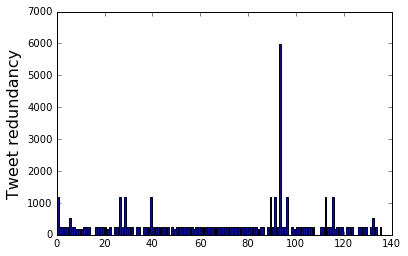

In [331]:
#Plot the redundancy of tweets

plt.bar([i for i in range(len(dupCounts))],dupCounts)
plt.ylabel('Tweet redundancy',fontsize=16)
#plt.title('duplicate tweets',fontsize=24)
#plt.xlabel('unique tweets')
#plt.bar([i for i in range(10)],range(10))

plt.ylim([0,7000])

plt.show()

# Preliminary tweet cleaning

In [340]:
# To build a list of tweets coming from and to JetBlue

toJetTweets   = list(set(tweets.loc[tweets.toHandler == '@JetBlue','message']))
fromJetTweets = list(set(tweets.loc[tweets.toHandler != '@JetBlue','message']))

In [307]:
#[i.lower() for i in ' '.join(toJetTweets).split()]

In [241]:
wordList = [i.lower() for i in ' '.join(uniqTweets).split()]
wordList = [i for i in wordList if i not in stopwords.words('english')]
#filtWords = [i for i in skillList.split() if i not in stopwords.words('english')]

/Users/Peter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


In [313]:
#wordList

In [246]:
freqWord = Counter(wordList).most_common(10)

In [317]:
def getFreqWords(tweetList,topWordThresh=10):
    wordList = [i.lower() for i in ' '.join(tweetList).split()]
    wordList = [i for i in wordList if i not in stopwords.words('english')]
    return Counter(wordList).most_common(topWordThresh)
getFreqWords(uniqTweets)

/Users/Peter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


[('flight', 20),
 ('sorry', 12),
 ('well', 12),
 ('please', 10),
 ('@jetblue', 10),
 ('hear', 10),
 ('us', 10),
 ('@1shirtsupport', 10),
 ('1/2', 9),
 ('delays', 9)]

In [347]:
uniqTweets
toJetTweets

['@JetBlue Ive now spent 12% of my flight time waiting at the carousel in JFK. I flew from San Diego! Unacceptable.',
 'Love when the @JetBlue worker tells me over the phone I have a window seat, but it turns out I dont and I really NEEDED to SLEEP on flight.',
 'I always confuse @JetBlue crew members when I use this bag\xe2\x80\xa6 \xe2\x80\x9cNo I don\xe2\x80\x99t work for JB\xe2\x80\xa6 ish\xe2\x80\xa6\xe2\x80\x9d\nWheels up to Boston! https://t.co/61fKRnYNpK',
 'Think Ill make my 6:50am @JetBlue flight out of Ft Lauderdale airport? @MiamiHerald @Tomas_Regalado https://t.co/RPlcrcwzTA',
 '@JetBlue Just DMd you. Thx for replying, thats why I always fly with yall.',
 '@JetBlue wheres the crew for flight 922? Been like half an hour past boarding time and their not here yet ??????']

/Users/Peter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


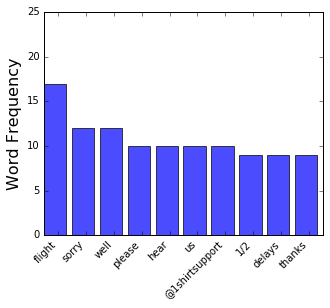

In [351]:
def plotFreqWords(freqWords):
    fig = plt.figure(figsize=(5,4), dpi=1600)
    ax = fig.add_subplot(111)

    plt.bar([i for i in range(10)],[i[1] for i in freqWords],alpha=0.7)
    plt.xticks([i+0.5  for i in range(10)], [i[0] for i in freqWords], rotation='vertical')

    ax.set_xticklabels([i[0] for i in freqWords],rotation=45,ha='right')
    ax.set_ylim(0,25)
    ax.set_ylabel('Word Frequency',fontsize=16)

    plt.show()
    
plotFreqWords(getFreqWords(fromJetTweets))

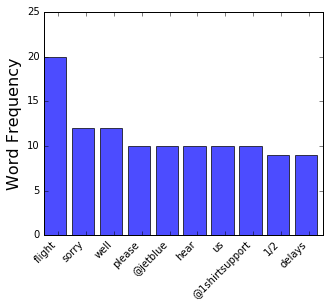

In [281]:
fig = plt.figure(figsize=(5,4), dpi=1600)
ax = fig.add_subplot(111)


plt.bar([i for i in range(10)],[i[1] for i in freqWord],alpha=0.7)
plt.xticks([i+0.5  for i in range(10)], [i[0] for i in freqWord], rotation='vertical')

ax.set_xticklabels([i[0] for i in freqWord],rotation=45,ha='right')
ax.set_ylim(0,25)
ax.set_ylabel('Word Frequency',fontsize=16)

plt.show()

In [372]:
for i in uniqTweets:
    if 'thanks' in i:
        print i
    

RT @1ShirtSupport: Tomorrows #TriviaTakeover once again! Well be giving away a random (size Large) T-Shirt, AND another poster thanks to …


In [ ]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [248]:
[len(freqWord)]

10

In [230]:
sorted(wordList.items(), key=operator.itemgetter(1),reverse=True)

[('the', 72),
 ('to', 68),
 ('for', 51),
 ('you', 39),
 ('your', 37),
 ('a', 36),
 ('and', 27),
 ('We', 26),
 ('of', 23),
 ('that', 22),
 ('is', 22),
 ('flight', 20),
 ('on', 19),
 ('we', 18),
 ('are', 17),
 ('Were', 16),
 ('in', 16),
 ('an', 16),
 ('can', 15),
 ('our', 15),
 ('out', 13),
 ('have', 13),
 ('I', 13),
 ('be', 11),
 ('with', 11),
 ('@JetBlue', 10),
 ('@1ShirtSupport', 10),
 ('hear', 10),
 ('us', 10),
 ('at', 10),
 ('1/2', 9),
 ('Please', 9),
 ('Sorry', 9),
 ('it', 9),
 ('from', 9),
 ('weather', 9),
 ('so', 8),
 ('its', 8),
 ('Thanks', 8),
 ('DM', 8),
 ('not', 8),
 ('2/2', 8),
 ('happy', 8),
 ('you.', 8),
 ('waiting', 7),
 ('airport', 7),
 ('departure', 7),
 ('flight.', 7),
 ('If', 7),
 ('know', 7),
 ('about', 7),
 ('there', 7),
 ('time', 7),
 ('The', 6),
 ('??', 6),
 ('RT', 6),
 ('crew', 6),
 ('reach', 6),
 ('up', 6),
 ('crewmembers', 6),
 ('will', 6),
 ('well', 6),
 ('way', 6),
 ('Well', 6),
 ('but', 6),
 ('when', 6),
 ('updated', 5),
 ('look', 5),
 ('this', 5),
 ('@Mike_

In [227]:
sortedFreq = sorted(wordList.items(), key=operator.itemgetter(1),reverse=True)

In [228]:
dict(sortedFreq)

{'#Cheers': 1,
 '#GoodMorning': 1,
 '#TriviaTakeover': 1,
 '#bestcustomeraward': 1,
 '#unitedsucks': 1,
 '$250': 1,
 '$300': 1,
 '$75.': 1,
 '&': 1,
 '(538-2583).': 1,
 '(if': 1,
 '(shared': 1,
 '(size': 1,
 '(which': 1,
 '+': 1,
 '-': 2,
 '-...': 1,
 '...Depending': 1,
 '...all': 1,
 '...and': 1,
 '...at': 1,
 '...delays,': 1,
 '...kept': 1,
 '...the': 1,
 '...to': 1,
 '...weather-related': 1,
 '...youre': 1,
 '1-800-JETBLUE': 2,
 '1/2': 9,
 '1/3': 1,
 '10:30': 2,
 '10:42': 1,
 '11:45': 1,
 '12%': 1,
 '14': 1,
 '1786': 1,
 '1st': 1,
 '2/2': 8,
 '2/3': 1,
 '3/3': 1,
 '30th': 1,
 '3ish': 1,
 '6:08': 1,
 '6:50am': 1,
 '8:15': 1,
 '8:58': 1,
 '90': 1,
 '922?': 1,
 '9:00': 1,
 '9:00.': 1,
 '9:25': 1,
 '9:31': 1,
 '9:55': 1,
 ':)': 3,
 ':/': 1,
 ':o': 1,
 '??': 6,
 '??????': 1,
 '????????': 1,
 '@1ShirtSupport': 10,
 '@1ShirtSupport:': 1,
 '@ACordov1': 3,
 '@AaronMShaffer': 1,
 '@Airababyfullam': 1,
 '@AlfieAlfonzo': 1,
 '@AuthorAkansha:': 1,
 '@BShieldsWFTV': 1,
 '@ButtercupEvents': 1,
 '@

In [309]:
#plt.plot([i for i in range(len(sortedFreq))],sortedFreq)

In [87]:
print tweets.iloc[45185]['message']

Think Ill make my 6:50am @JetBlue flight out of Ft Lauderdale airport? @MiamiHerald @Tomas_Regalado https://t.co/RPlcrcwzTA


In [185]:
print tweets.iloc[45229]['message']
tweets.iloc[45229]['message']

I always confuse @JetBlue crew members when I use this bag… “No I don’t work for JB… ish…”
Wheels up to Boston! https://t.co/61fKRnYNpK


'I always confuse @JetBlue crew members when I use this bag\xe2\x80\xa6 \xe2\x80\x9cNo I don\xe2\x80\x99t work for JB\xe2\x80\xa6 ish\xe2\x80\xa6\xe2\x80\x9d\nWheels up to Boston! https://t.co/61fKRnYNpK'

In [182]:
tknzr = TweetTokenizer()

In [183]:
tknzr.tokenize(tweets.iloc[45229]['message'])

[u'I',
 u'always',
 u'confuse',
 u'@JetBlue',
 u'crew',
 u'members',
 u'when',
 u'I',
 u'use',
 u'this',
 u'bag',
 u'\u2026',
 u'\u201c',
 u'No',
 u'I',
 u'don',
 u'\u2019',
 u't',
 u'work',
 u'for',
 u'JB',
 u'\u2026',
 u'ish',
 u'\u2026',
 u'\u201d',
 u'Wheels',
 u'up',
 u'to',
 u'Boston',
 u'!',
 u'https://t.co/61fKRnYNpK']

In [200]:
len(list(set(tweets.message)))

136

In [312]:
[i for i in wordList if i.startswith('#')]
[i for i in wordList if i.startswith('@')]

['@otothebeirne:',
 '@jetblue!',
 '@jsa1987',
 '@juls7826l',
 '@thebowmaniac',
 '@____alyssa',
 '@1shirtsupport:',
 '@cyndynayer',
 '@itskizzlebtch',
 '@1shirtsupport',
 '@gamegrumps',
 '@jack_septic_eye',
 '@1shirtsupport',
 '@gillyannandale:',
 '@1shirtsupport',
 '@gamegrumps',
 '@jeff_harris_nz',
 '@therealkirka',
 '@zacxwolf',
 '@kibskelble',
 '@tyleroeaster',
 '@lladkins',
 '@lizgarciasells',
 '@jodyph1',
 '@katinka118',
 '@rosemariochoa',
 '@shawesum',
 '@1shirtsupport',
 '@irancampana',
 '@seanbarakett',
 '@jcalabrese87',
 '@meranierichtman',
 '@jetblue',
 '@miamiherald',
 '@tomas_regalado',
 '@acordov1',
 '@jetblue',
 '@slidingsideways',
 '@mike_gramajo',
 '@turms19',
 '@tyleroeaster',
 '@elleaydoubleyou',
 '@rp3_22',
 '@____alyssa',
 '@mlarosa84',
 '@wdelmolino',
 '@itskizzlebtch',
 '@jetblue',
 '@booksthatmatter',
 '@acordov1',
 '@clawng',
 '@nickjohnsoncnn',
 '@jsa1987',
 '@cariebrdshaw',
 '@nickarnheim',
 '@chemdivasitech',
 '@zbpolin',
 '@jack_septic_eye',
 '@1shirtsupport

In [370]:
print uniqTweets[0]
tknzr.tokenize(uniqTweets[0])

RT @OtotheBeirne: Excellent flight ?? @JetBlue! Question tho, if u knew flight was delayed in morning, why wait until 3ish to tell us? https…


[u'RT',
 u'@OtotheBeirne',
 u':',
 u'Excellent',
 u'flight',
 u'?',
 u'?',
 u'@JetBlue',
 u'!',
 u'Question',
 u'tho',
 u',',
 u'if',
 u'u',
 u'knew',
 u'flight',
 u'was',
 u'delayed',
 u'in',
 u'morning',
 u',',
 u'why',
 u'wait',
 u'until',
 u'3ish',
 u'to',
 u'tell',
 u'us',
 u'?',
 u'https',
 u'\u2026']

# Some sklearn stuff

In [373]:
from sklearn.feature_extraction import DictVectorizer

In [374]:
measurements = [
...     {'city': 'Dubai', 'temperature': 33.},
...     {'city': 'London', 'temperature': 12.},
...     {'city': 'San Fransisco', 'temperature': 18.},
... ]

In [377]:
vec = DictVectorizer()

In [378]:
vec.fit_transform(measurements).toarray()

array([[  1.,   0.,   0.,  33.],
       [  0.,   1.,   0.,  12.],
       [  0.,   0.,   1.,  18.]])

In [379]:
vec.get_feature_names()

['city=Dubai', 'city=London', 'city=San Fransisco', 'temperature']

In [380]:
from sklearn.feature_extraction.text import CountVectorizer

In [382]:
vectorizer = CountVectorizer(min_df=1)
vectorizer             

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [383]:
>>> corpus = [
...     'This is the first document.',
...     'This is the second second document.',
...     'And the third one.',
...     'Is this the first document?',
... ]
>>> X = vectorizer.fit_transform(corpus)
>>> X             

<4x9 sparse matrix of type '<type 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [385]:
>>> analyze = vectorizer.build_analyzer()
>>> analyze("This is a text document to analyze.") == (
...     ['this', 'is', 'text', 'document', 'to', 'analyze'])


True

In [386]:
>>> vectorizer.get_feature_names() == (
...     ['and', 'document', 'first', 'is', 'one',
...      'second', 'the', 'third', 'this'])
True

>>> X.toarray()           

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [387]:
>>> vectorizer.vocabulary_.get('document')

1

In [388]:
>>> vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [389]:
>>> bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
...                                     token_pattern=r'\b\w+\b', min_df=1)
>>> analyze = bigram_vectorizer.build_analyzer()
>>> analyze('Bi-grams are cool!') == (
...     ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

True

In [390]:
>>> X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
>>> X_2

array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

In [391]:
>>> feature_index = bigram_vectorizer.vocabulary_.get('is this')
>>> X_2[:, feature_index]     

array([0, 0, 0, 1])

In [394]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


In [395]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']


In [396]:
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

In [400]:
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

3387 documents
4 categories



In [409]:
dataset.keys()
#dataset['DESCR']

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']

In [415]:
use_hashing = True
use_idf = True
n_features = 10000

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if use_hashing:
    if use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=n_features,
                                   stop_words='english', non_negative=True,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=n_features,
                                       stop_words='english',
                                       non_negative=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=use_idf)
X = vectorizer.fit_transform(dataset.data)


Extracting features from the training dataset using a sparse vectorizer


In [417]:
n_components = 0
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()


done in 461.100359s
n_samples: 3387, n_features: 10000



In [422]:
###############################################################################
# Do the actual clustering

minibatchBool = True
verboseBool = False

if minibatchBool:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=verboseBool)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=False)
done in 0.134s

Homogeneity: 0.467
Completeness: 0.532
V-measure: 0.497
Adjusted Rand-Index: 0.403
Silhouette Coefficient: 0.006



In [428]:
use_hashing = False

if not use_hashing:
    print("Top terms per cluster:")

    if n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:


AttributeError: 'Pipeline' object has no attribute 'get_feature_names'